In [1]:
from fastai.vision import *
import os
data_path = os.path.join(os.getcwd(), "data")

In [408]:
def get_labels(file): 
    points_df = pd.read_csv(str(file) + ".cat", sep=" ", header=None)
    points = (points_df.values[0][1:-1]).reshape((-1, 2))
    points[:, [0, 1]] = points[:, [1, 0]]
    
    old_size = open_image(os.path.join(file)).size
    points_ratio =  np.array([224,224]) / np.array(old_size)

    points = Tensor(points * points_ratio)
    
    return Tensor(points)

get_labels(os.path.join(data_path, "CAT_00", "00000352_000.jpg"))

tensor([[ 77.2658,  97.2160],
        [ 77.2658, 116.9280],
        [104.2025, 103.4880],
        [ 60.9620,  88.7040],
        [ 22.6835,  83.7760],
        [ 47.4937, 101.2480],
        [ 47.4937, 115.1360],
        [ 19.8481, 126.7840],
        [ 60.9620, 135.2960]])

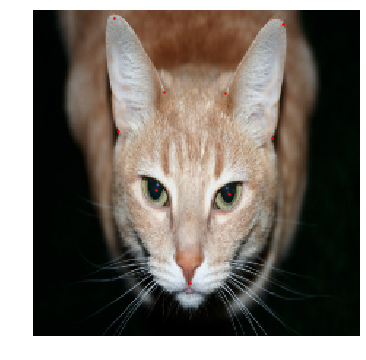

In [422]:
img_path = os.path.join(data_path, "CAT_01", "00000256_006.jpg")
img = open_image(img_path).resize(224)
points = ImagePoints(FlowField(img.size, get_labels(img_path)))
img.show(y=points, figsize=(9, 6))

In [412]:
data = (PointsItemList.from_folder(data_path, extensions=".jpg")
       .split_by_rand_pct() # Later split by folder
       .label_from_func(get_labels) 
       .transform(get_transforms(), size=(224, 224))
       .databunch().normalize(imagenet_stats)
       )

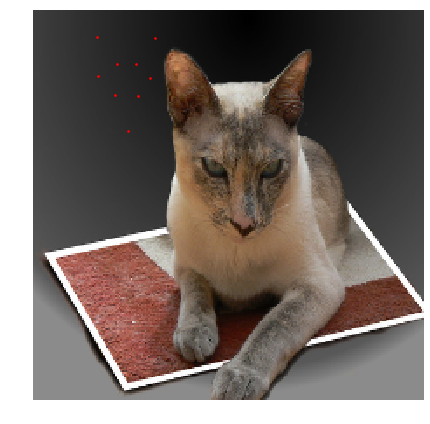

In [418]:
data.show_batch(1, figsize=(9, 6))